In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train , y_train) , (X_test , y_test)  = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(y_test)

10000

In [7]:
X_train[0].shape

(28, 28)

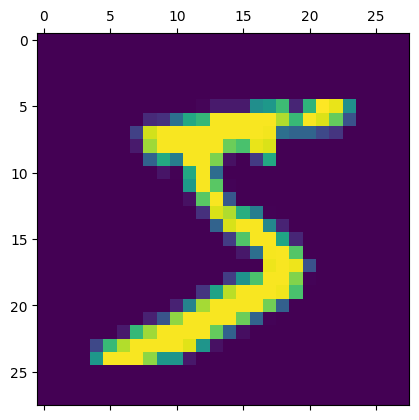

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

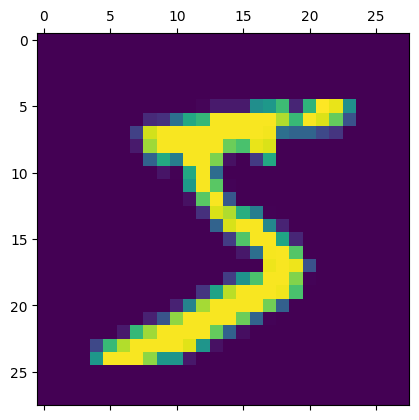

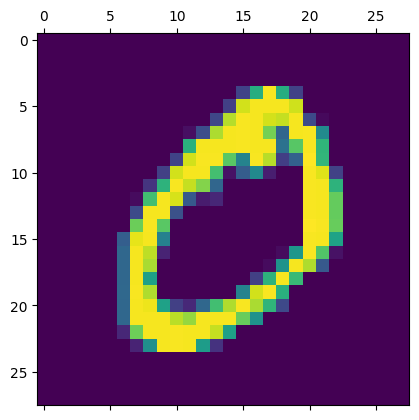

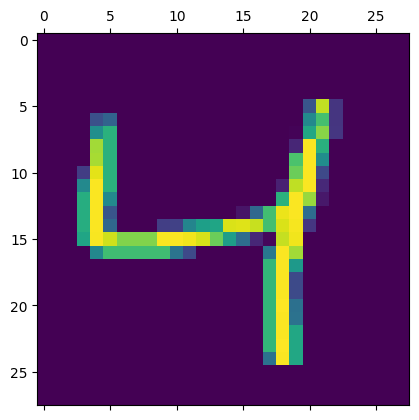

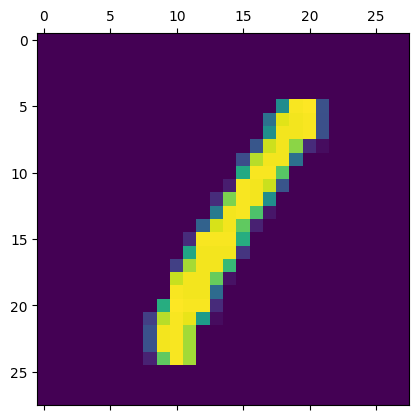

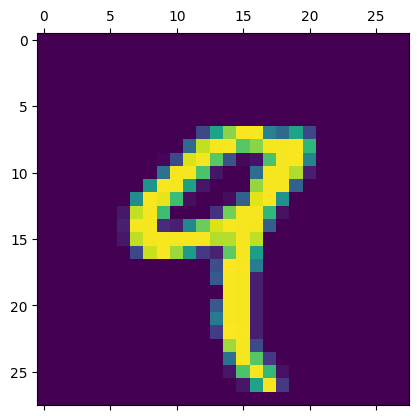

In [10]:
for i in range(5):
    plt.matshow(X_train[i])

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_test_flattened.shape

(10000, 784)

### Very simple neural network with no hidden layers

![network](digits_nn.jpg)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8776
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9144
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9204
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9239
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9277


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.9257


[0.27091407775878906, 0.9257000088691711]

In [21]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


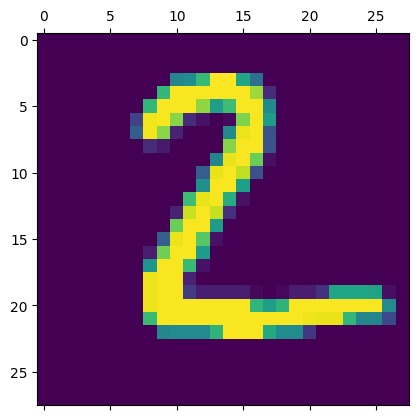

In [22]:
plt.matshow(X_test[1])

In [23]:
np.argmax(y_predict[1])

2

In [24]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [25]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    6,    7,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  902,   25,   10,    6,   14,    9,   46,    5],
       [   3,    0,    9,  918,    1,   30,    3,    9,   27,   10],
       [   1,    1,    2,    2,  909,    0,   14,    3,   10,   40],
       [  10,    2,    1,   21,    8,  793,   15,    4,   31,    7],
       [   9,    3,    2,    2,    7,   14,  918,    1,    2,    0],
       [   2,    6,   20,    9,    9,    2,    0,  926,    4,   50],
       [   6,    7,    5,   18,    9,   25,   10,    5,  881,    8],
       [  10,    5,    1,    6,   23,    8,    0,   10,    9,  937]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

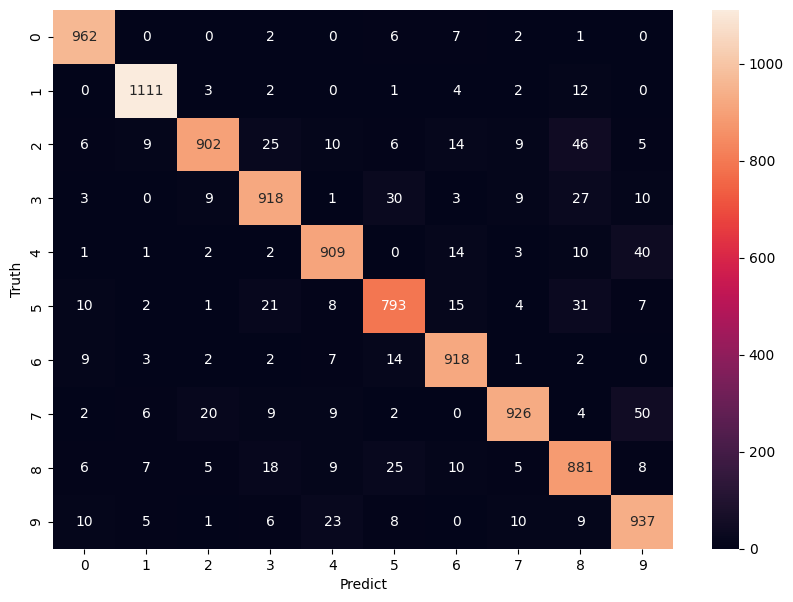

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9221
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1232 - accuracy: 0.9640
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.9731
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9842
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9869


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9765


[0.08116364479064941, 0.9764999747276306]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

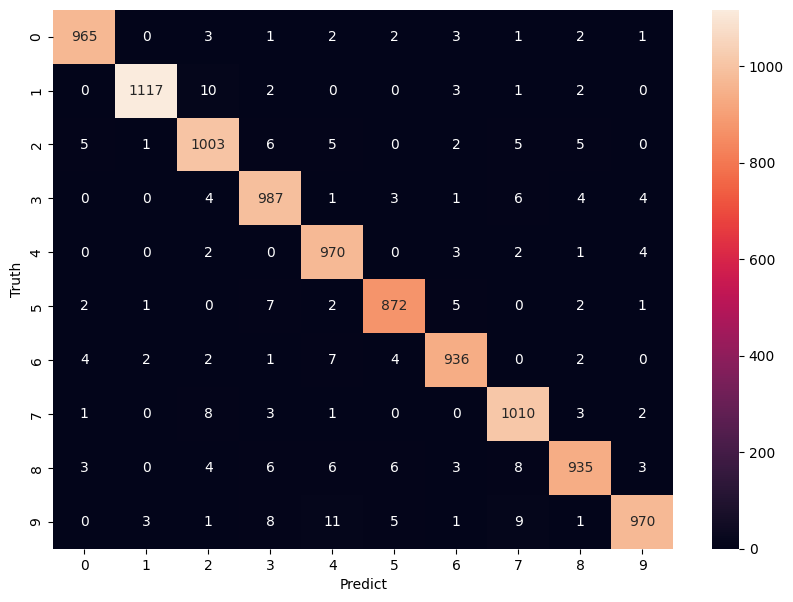

In [30]:
y_predict = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1155 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0818 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0294 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.022

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9754


[0.0972033366560936, 0.9753999710083008]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

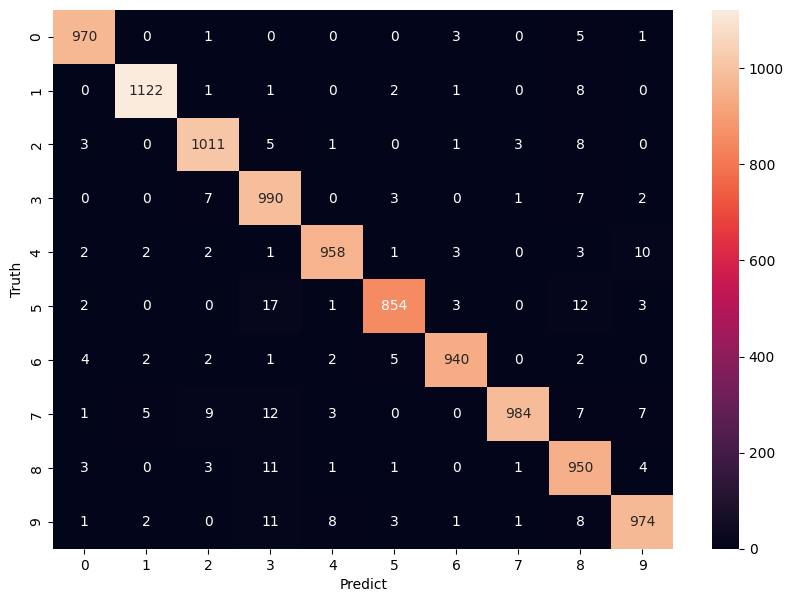

In [33]:
y_predict = model.predict(X_test)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')